In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\\Users\\91797\\Downloads\\car_data.csv")
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [3]:
df.shape

(550, 12)

In [4]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [5]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

<Axes: >

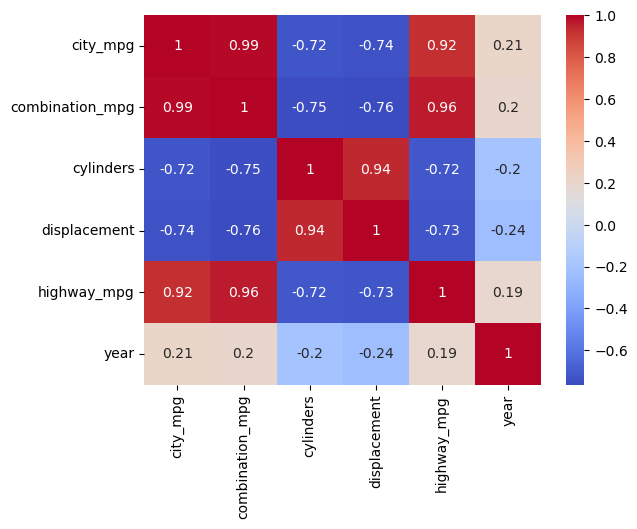

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder



In [12]:
label_encoder = LabelEncoder()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [14]:
# df['y'] = label_encoder.fit_transform(df['y'])

df['class'] = label_encoder.fit_transform(df['class'])
df['drive'] = label_encoder.fit_transform(df['drive'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    int64  
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    int64  
 6   fuel_type        548 non-null    int64  
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    int32  
 9   model            548 non-null    int32  
 10  transmission     548 non-null    int32  
 11  year             548 non-null    int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 49.2 KB


In [16]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,19,36,19,15,1,2014
1,26,2,30,4.0,2.5,2,19,37,19,15,0,2014
2,25,7,27,4.0,2.5,2,19,31,19,74,0,2014
3,26,7,29,4.0,2.0,2,19,34,19,74,1,2014
4,26,7,28,4.0,2.0,2,19,32,19,74,0,2014


In [17]:
X = df.drop("city_mpg", axis=1)
y = df['city_mpg']

In [18]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Accuracy of the model: 71.82%
